# Plotting Figure 13
> Combined linear domain for Rijke Tube and Slit Flame

Slope Re Rijke: -98.9735938639569
Slope Im Rijke: 1.6224164065448496
Slope Re Slit Flame: -734881.6170426515
Slope Im Slit Flame: -1907.033508284261


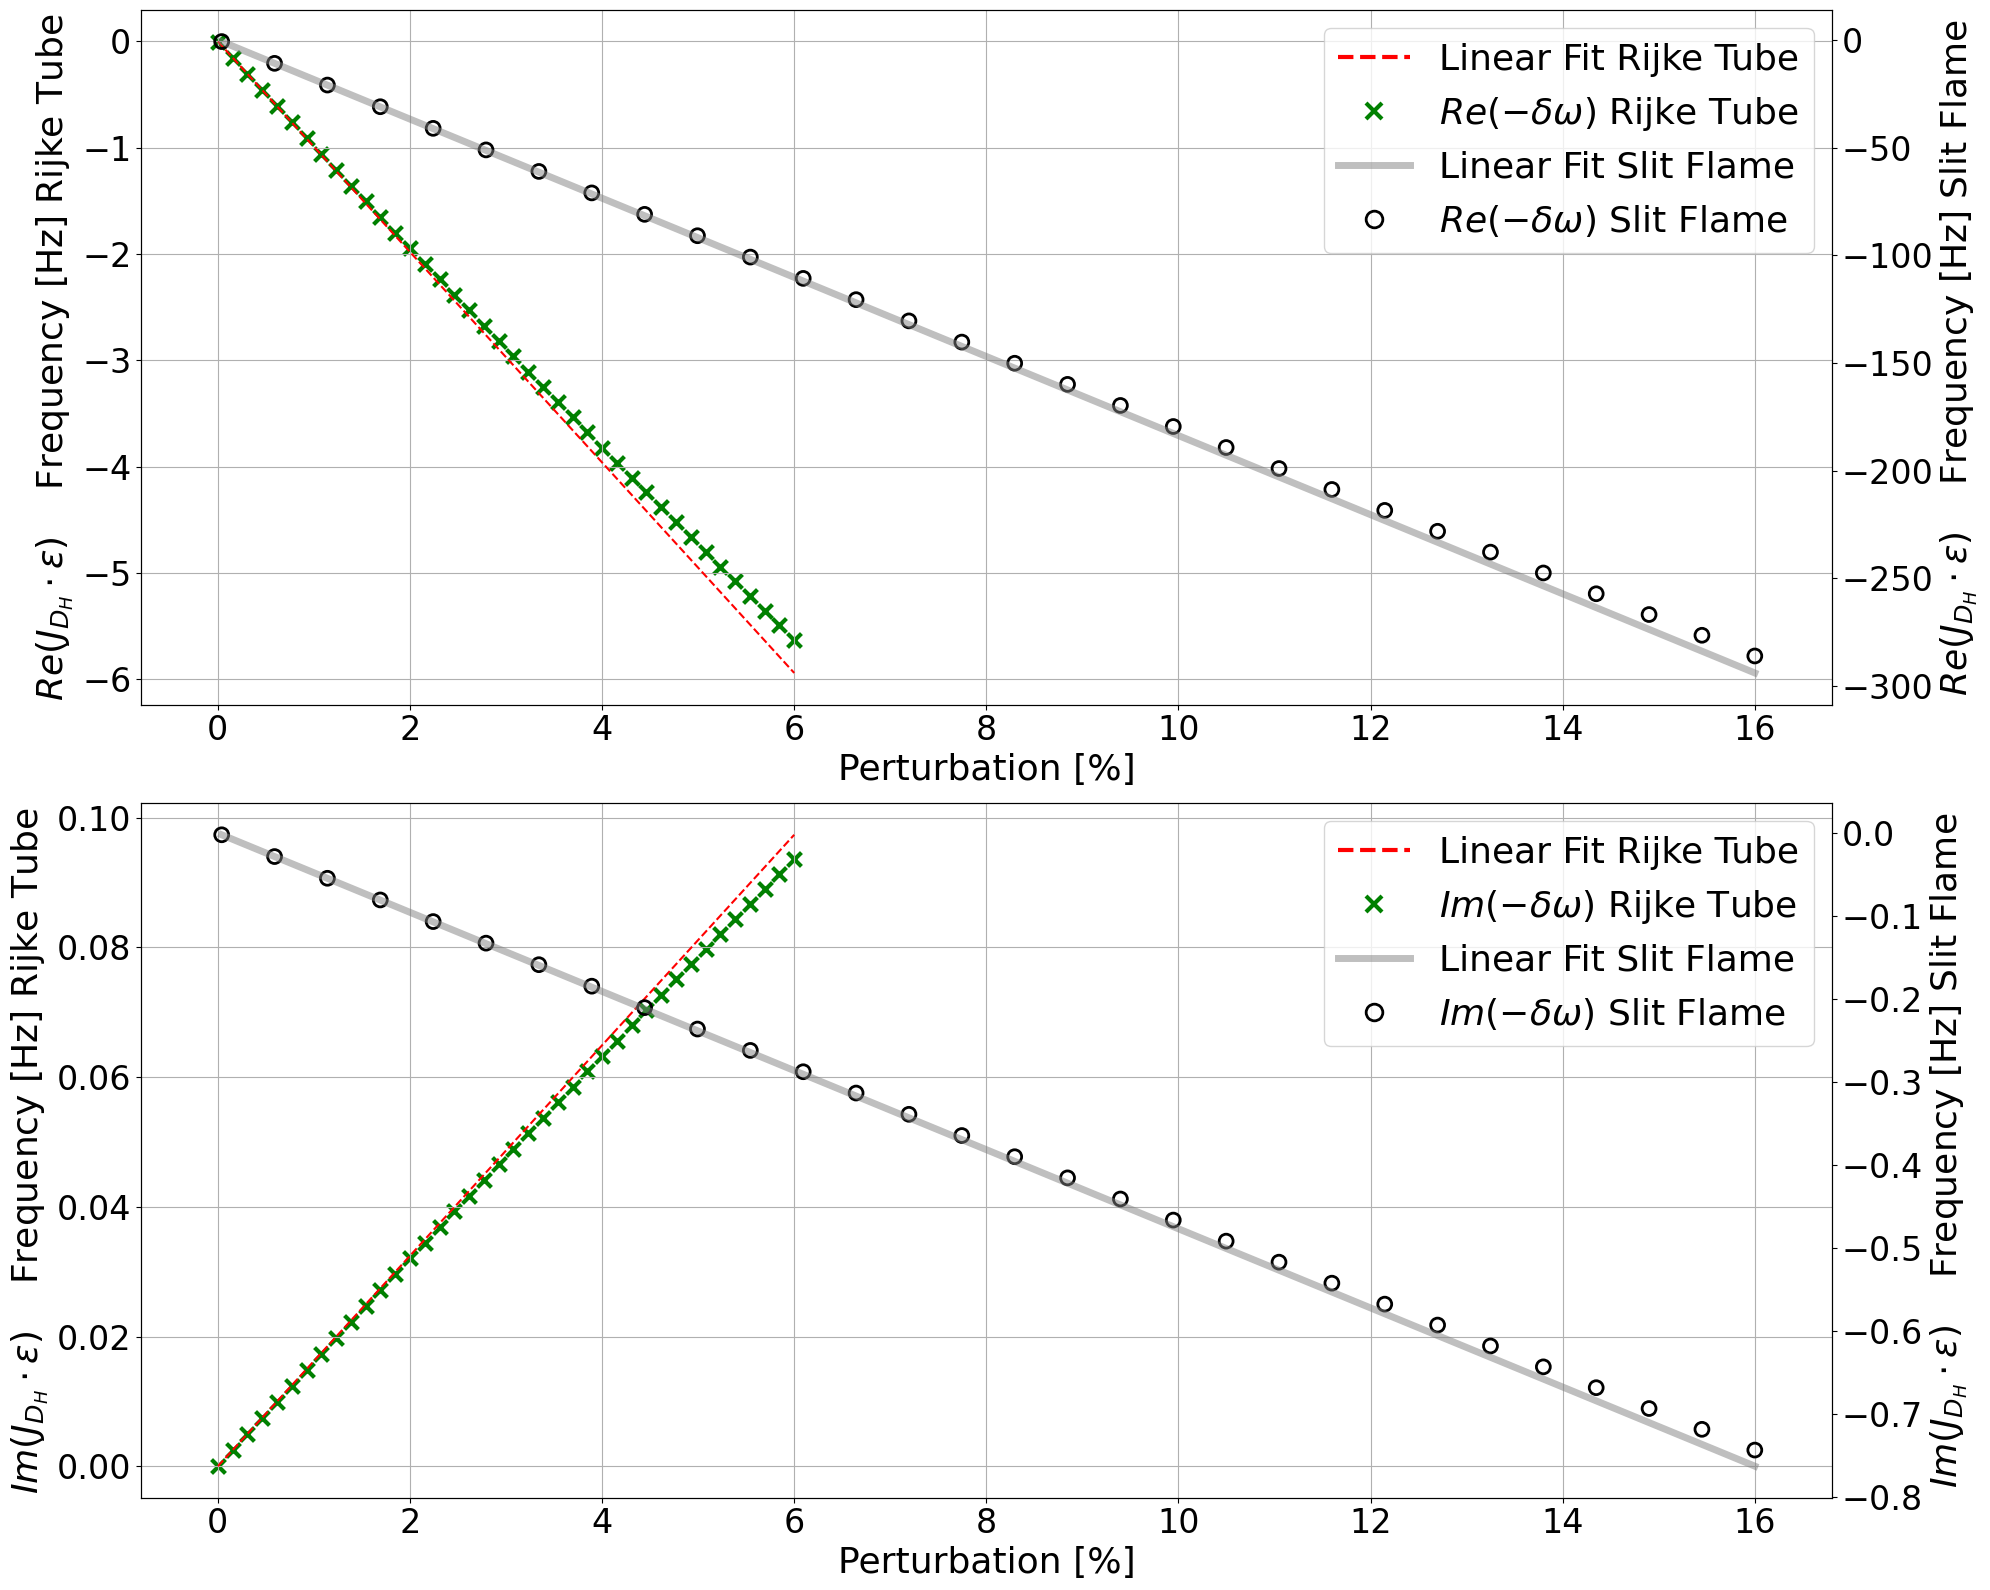

In [87]:
import os
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

fontsize = 26
os.chdir(os.path.join(os.getcwd()))
file1 = os.path.join('data_fig1.txt')
file2 = os.path.join('data_fig8.txt')

# read data for Rijke Tube and Slit Flame
with open(file1, 'r') as f:
    lines1 = f.readlines()
with open(file2, 'r') as f:
    lines2 = f.readlines()
perturbations1 = []
real_discrete_shape_derivatives1 = []
imag_discrete_shape_derivatives1 = []
perturbations2 = []
real_discrete_shape_derivatives2 = []
imag_discrete_shape_derivatives2 = []

# Read the data from the file
for line1 in lines1[1:]: # skip the first line
    p, real, imag = map(float, line1.strip().split(','))
    perturbations1.append(p)
    real_discrete_shape_derivatives1.append(real)
    imag_discrete_shape_derivatives1.append(imag)
# Read the data from the file2
for line2 in lines2[1:]: # skip the first line
    p, real, imag = map(float, line2.strip().split(','))
    perturbations2.append(p)
    real_discrete_shape_derivatives2.append(real)
    imag_discrete_shape_derivatives2.append(imag)
# transform the lists into numpy arrays to perform operations
perturbations1 = np.array(perturbations1)
perturbations2 = np.array(perturbations2)

# create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))
# Create twin axes
# ax1_right = ax1.twinx()
# ax2_right = ax2.twinx()
# ax1_top = ax1.twiny()
# ax2_top = ax2.twiny()

### RIJKE TUBE ###
# real part
real_slope, real_intercept = np.polyfit(perturbations1[:2], real_discrete_shape_derivatives1[:2], 1)
real_linear_fit = real_slope * perturbations1 + real_intercept
print('Slope Re Rijke:', real_slope)
ax1.plot(perturbations1*100, real_linear_fit, 'r--', label='Linear Fit Rijke Tube')
# imaginary part
imag_slope, imag_intercept = np.polyfit(perturbations1[:2], imag_discrete_shape_derivatives1[:2], 1)
imag_linear_fit = imag_slope * perturbations1 + imag_intercept
print('Slope Im Rijke:', imag_slope)
ax2.plot(perturbations1*100, imag_linear_fit, 'r--', label='Linear Fit Rijke Tube')
# Plot the real part of shape derivatives
ax1.scatter(perturbations1*100, real_discrete_shape_derivatives1, color='green', marker='x',s=100,linewidth=3, label=r'$Re(-\delta \omega)$ Rijke Tube')
# Set labels and title
ax1.set_xlabel('Perturbation [%]', fontsize=fontsize)
ax1.set_ylabel(r'$Re(J_{D_H}\cdot \epsilon)$    Frequency [Hz] Rijke Tube', fontsize=fontsize)
#ax1.legend(loc='lower left', fontsize=fontsize)
ax1.grid(True)
# plot the imaginary part of shape derivatives
ax2.scatter(perturbations1*100, imag_discrete_shape_derivatives1, marker='x',linewidth=3,s=100, label=r'$Im(-\delta \omega)$ Rijke Tube', color='green')
# Set labels and title
ax2.set_xlabel('Perturbation [%]', fontsize=fontsize)
ax2.set_ylabel(r'$Im(J_{D_H}\cdot \epsilon)$    Frequency [Hz] Rijke Tube', fontsize=fontsize)
#ax2.legend(loc='upper left', fontsize=fontsize)
ax2.grid(True)


# set more axis
ax1x = ax1.twinx()  # Create a third twin axis for the right side
#ax1y = ax1.twiny()  # Create a twin axis for the top side
ax2x = ax2.twinx()  # Create a third twin axis for the right side
#ax2y = ax2.twiny()  # Create a twin axis for the top side

### SLIT FLAME ###
# real part
real_slope, real_intercept = np.polyfit(perturbations2[:2], real_discrete_shape_derivatives2[:2], 1)
real_linear_fit = real_slope * perturbations2 + real_intercept
print('Slope Re Slit Flame:', real_slope)
ax1x.plot(perturbations2/2.5e-3*100, real_linear_fit, color='grey', linewidth=5, alpha=0.5, label='Linear Fit Slit Flame')
# imaginary part
imag_slope, imag_intercept = np.polyfit(perturbations2[:2], imag_discrete_shape_derivatives2[:2], 1)
imag_linear_fit = imag_slope * perturbations2 + imag_intercept
print('Slope Im Slit Flame:', imag_slope)
ax2x.plot(perturbations2/2.5e-3*100, imag_linear_fit, color='grey', linewidth=5, alpha=0.5, label='Linear Fit Slit Flame')
# Plot the real part of shape derivatives
ax1x.scatter(perturbations2/2.5e-3*100, real_discrete_shape_derivatives2, facecolors='none', edgecolors='black', marker='o', s=100, linewidth=2, label=r'$Re(-\delta \omega)$ Slit Flame')
# Set labels and title
#ax3.set_xlabel('Perturbation [%]', fontsize=fontsize)
ax1x.set_ylabel(r'$Re(J_{D_H}\cdot \epsilon)$    Frequency [Hz] Slit Flame', fontsize=fontsize)
#ax1x.legend(loc='lower right', fontsize=fontsize)
# plot the imaginary part of shape derivatives
ax2x.scatter(perturbations2/2.5e-3*100, imag_discrete_shape_derivatives2, facecolors='none', edgecolors='black', marker='o', s=100, linewidth=2, label=r'$Im(-\delta \omega)$ Slit Flame')
# Set labels and title
ax2x.set_ylabel(r'$Im(J_{D_H}\cdot \epsilon)$    Frequency [Hz] Slit Flame', fontsize=fontsize)
#ax2x.legend(loc='lower right', fontsize=fontsize)

# Custom legend handles

custom_lines = [
    Line2D([0], [0], color='r', linestyle='--', lw=3, label='Linear Fit Rijke Tube'),
    Line2D([0], [0], color='green', marker='x', linestyle='None', markersize=12, markeredgewidth=3, label=r'$Re(-\delta \omega)$ Rijke Tube'),
    Line2D([0], [0], color='grey', lw=5, alpha=0.5, label='Linear Fit Slit Flame'),
    Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=12, markerfacecolor='none', markeredgewidth=2, label=r'$Re(-\delta \omega)$ Slit Flame')
]

ax1.legend(handles=custom_lines, loc='upper right', fontsize=fontsize)

custom_lines2 = [
    Line2D([0], [0], color='r', linestyle='--', lw=3, label='Linear Fit Rijke Tube'),
    Line2D([0], [0], color='green', marker='x', linestyle='None', markersize=12, markeredgewidth=3, label=r'$Im(-\delta \omega)$ Rijke Tube'),
    Line2D([0], [0], color='grey', lw=5, alpha=0.5, label='Linear Fit Slit Flame'),
    Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=12, markerfacecolor='none', markeredgewidth=2, label=r'$Im(-\delta \omega)$ Slit Flame')
]

ax2.legend(handles=custom_lines2, loc='upper right', fontsize=fontsize)


# Increase the font size of the axis numbers
ax1.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax1x.tick_params(axis='both', which='major', labelsize=24)
ax2x.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout() # make plot look better
plt.show() # show the plot

# Save the figure to the 'Images/' folder
os.makedirs('Images/', exist_ok=True)
fig.savefig(os.path.join('Images/', 'Fig12.png'))